In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
plt.style.use('dark_background')

In [2]:
df = pd.read_csv("dataset.csv")

<AxesSubplot:>

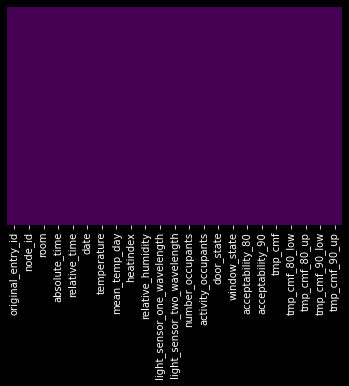

In [3]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [4]:
df.columns

Index(['original_entry_id', 'node_id', 'room', 'absolute_time',
       'relative_time', 'date', 'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity', 'light_sensor_one_wavelength',
       'light_sensor_two_wavelength', 'number_occupants', 'activity_occupants',
       'door_state', 'window_state', 'acceptability_80', 'acceptability_90',
       'tmp_cmf', 'tmp_cmf_80_low', 'tmp_cmf_80_up', 'tmp_cmf_90_low',
       'tmp_cmf_90_up'],
      dtype='object')

# Multivariate

## temperature

TODO: make it so its mean temp per hour per selected month

In [5]:
# df_march_2016 = df[df['date'].str.contains('03/2016',case=False)]
# plt.rcParams["figure.figsize"] = (13,10)
# sns.lineplot( data=df_march_2016, x="date", y="temperature")

## Heatmap

In [6]:
def convert_room(x):
    if(str(x).upper() == 'A'):
        return 0
    if(str(x).upper() == 'B'):
        return 1
    if(str(x).upper() == 'C'):
        return 2
    else:
        return -1
df['room'] = df['room'].apply(convert_room)

<AxesSubplot:>

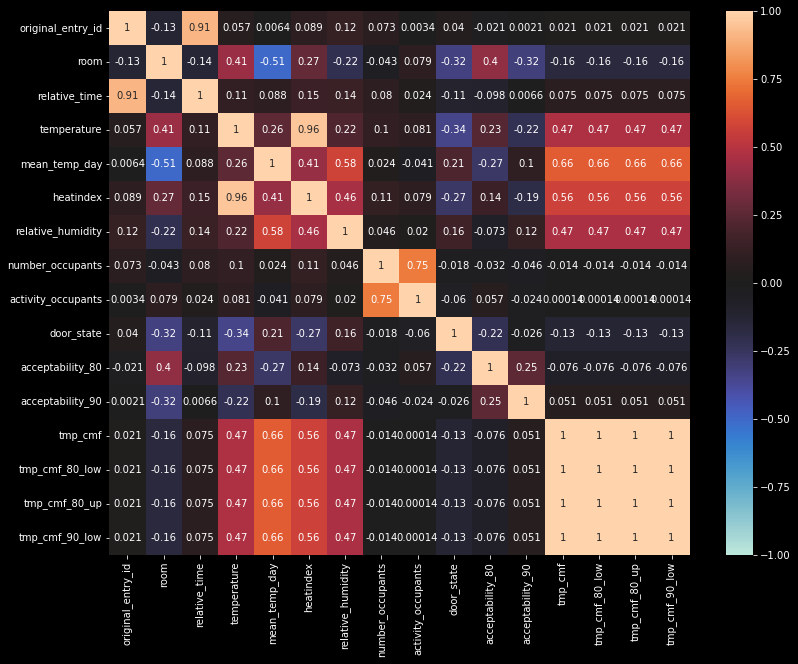

In [7]:
plt.rcParams["figure.figsize"] = (13,10)
mask = df[['original_entry_id', 'room', 
       'relative_time',  'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity',  'number_occupants', 'activity_occupants',
       'door_state','acceptability_80', 'acceptability_90', 
       'tmp_cmf', 
       'tmp_cmf_80_low', 
       'tmp_cmf_80_up', 
       'tmp_cmf_90_low']]
sns.heatmap(mask.corr(), annot = True,  vmin =-1, vmax = 1, center = 0)